[0, 1e-20, 3e-20, 1e-19, 3e-19, 1e-18, 3e-18, 1e-17, 3e-17, 1e-16, 3e-16, 1e-15, 3e-15, 1e-14, 3e-14, 1e-13, 3e-13, 1e-12, 3e-12, 1e-11, 3e-11, 1e-10, 3e-10, 1e-09, 3e-09, 1e-08, 3e-08, 1e-07, 3e-07, 1e-06, 3e-06, 1e-05, 3e-05]


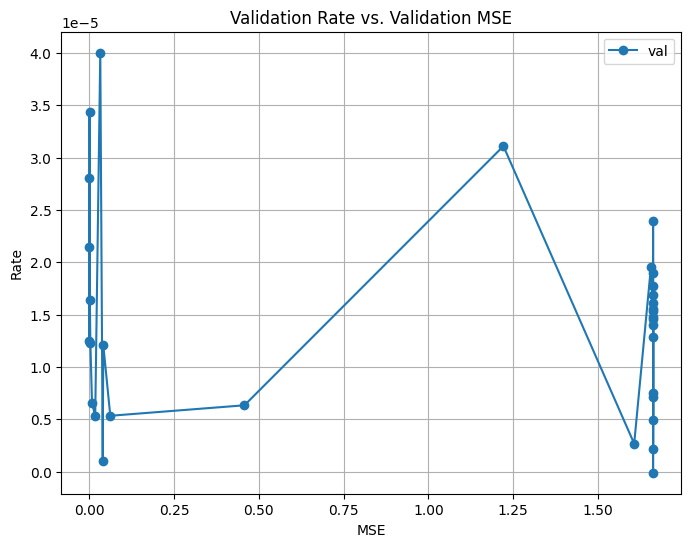

In [7]:
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob

# 디렉토리 경로 설정
# directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/gemma_2b_attn_d=256_b=512'  # 원하는 디렉토리 경로로 변경
directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d=256_b=1024'  # 원하는 디렉토리 경로로 변경
directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d=32_b=1024'  # 원하는 디렉토리 경로로 변경
directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d=2048_b=1024'  # 원하는 디렉토리 경로로 변경
directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d=1024_b=1024'  # 원하는 디렉토리 경로로 변경
directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d=128_b=1024'  # 원하는 디렉토리 경로로 변경
units='2000_2000_2000'
units='1000_1000_1000'

file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

dirlist  = os.listdir(directory)
lmbdas = set([0])
for d in dirlist:
    if not 'lmbda=' in d:
        continue
    start = d.find('lmbda=') + len('lmbda=')
    end = d.find('-encoder', start)
    lmbda_value = float(d[start:end])
    # print(lmbda_value)
    lmbdas.add(lmbda_value)

# print(lmbdas)
lmbdas = sorted(lmbdas)
# lmbdas = lmbdas[1:19]
print(lmbdas)
data_dict = {}

if 0 in lmbdas:
    for file_path in file_list:
        if (not f'lmbda' in file_path) and f'units={units}' in file_path:
            with open(file_path, 'r') as f:
                for line in f:
                    data_dict[0].append(json.loads(line))

for l in lmbdas: 
    data_dict[l] = []
for l in lmbdas:
    for file_path in file_list:
        if (f'lmbda={l}' in file_path) and f'units={units}'  in file_path:
            with open(file_path, 'r') as f:
                for line in f:
                    data_dict[l].append(json.loads(line))




def get_rate_mse(e, data):
    for entry in data:
        if entry['epoch'] == e:
            return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
    return None, None, None, None  # 해당 epoch이 없을 경우



# val_rate와 val_mse 데이터를 리스트로 추출
epoch = 19
# for epoch in range(10,11):
data = [get_rate_mse(epoch, data_dict[l]) for l in lmbdas]
# sorted_data = sorted(data, key=lambda x: x[1])

val_rate = [entry[0] for entry in data]
val_mse = [entry[1] for entry in data]
rate = [entry[2] for entry in data]
mse = [entry[3] for entry in data]

# 플롯 그리기
plt.figure(figsize=(8, 6))
plt.plot(val_mse, val_rate, marker='o', linestyle='-', label='val')
# plt.plot(mse, rate, marker='o', linestyle='-', label='train')

# 그래프 제목 및 레이블 설정
plt.title('Validation Rate vs. Validation MSE')
plt.xlabel('MSE')
plt.ylabel('Rate')
plt.legend()
# 그리드 추가
plt.grid(True)

# 그래프 보여주기
plt.show()

In [8]:
for i in range(len(lmbdas)):
    print(val_rate[i], val_mse[i], lmbdas[i])
    print(rate[i], mse[i], lmbdas[i])

None None 0
None None 0
1.77011e-05 1.66284 1e-20
3.08483e-05 1.6627 1e-20
1.53354e-05 1.66286 3e-20
2.98905e-05 1.66271 3e-20
1.40135e-05 1.66285 1e-19
3.13089e-05 1.66271 1e-19
2.16126e-06 1.66282 3e-19
3.53454e-05 1.6627 3e-19
1.28661e-05 1.66281 1e-18
3.20931e-05 1.6627 1e-18
1.48126e-05 1.66283 3e-18
2.93784e-05 1.6627 3e-18
1.46206e-05 1.66287 1e-17
3.10142e-05 1.66271 1e-17
7.12752e-06 1.66284 3e-17
3.13451e-05 1.66271 3e-17
4.93884e-06 1.6628 1e-16
3.53014e-05 1.6627 1e-16
7.50765e-06 1.66283 3e-16
3.14819e-05 1.6627 3e-16
2.38952e-05 1.66285 1e-15
3.03837e-05 1.66271 1e-15
1.89944e-05 1.66287 3e-15
3.12051e-05 1.6627 3e-15
1.61377e-05 1.66281 1e-14
3.0828e-05 1.6627 1e-14
-1.01328e-07 1.66281 3e-14
3.01753e-05 1.6627 3e-14
1.68523e-05 1.66277 1e-13
3.13389e-05 1.66262 1e-13
1.55756e-05 1.66226 3e-13
3.01901e-05 1.6621 3e-13
1.95302e-05 1.65643 1e-12
3.08962e-05 1.6562 1e-12
2.67655e-06 1.60709 3e-12
3.10376e-05 1.60694 3e-12
3.10908e-05 1.22142 1e-11
3.07324e-05 1.22127 1e-11


In [17]:
data_dict

{1e-20: [{'epoch': 0,
   'loss': 3.63897,
   'rate': 3.63897,
   'mse': 1.12019,
   'val_loss': 0.837413,
   'val_rate': 0.837413,
   'val_mse': 1.1188},
  {'epoch': 1,
   'loss': 0.772437,
   'rate': 0.772437,
   'mse': 1.11801,
   'val_loss': 0.644114,
   'val_rate': 0.644114,
   'val_mse': 1.11306},
  {'epoch': 2,
   'loss': 0.589583,
   'rate': 0.589583,
   'mse': 1.11475,
   'val_loss': 0.489241,
   'val_rate': 0.489241,
   'val_mse': 1.11006},
  {'epoch': 3,
   'loss': 0.479839,
   'rate': 0.479839,
   'mse': 1.1121,
   'val_loss': 0.488303,
   'val_rate': 0.488303,
   'val_mse': 1.1183},
  {'epoch': 4,
   'loss': 0.397094,
   'rate': 0.397094,
   'mse': 1.10967,
   'val_loss': 0.355766,
   'val_rate': 0.355766,
   'val_mse': 1.10771},
  {'epoch': 5,
   'loss': 0.337412,
   'rate': 0.337412,
   'mse': 1.10767,
   'val_loss': 0.301487,
   'val_rate': 0.301487,
   'val_mse': 1.1037},
  {'epoch': 6,
   'loss': 0.297406,
   'rate': 0.297406,
   'mse': 1.10576,
   'val_loss': 0.279618

In [32]:
for l in lmbdas:
    print(len(data_dict[l]))

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


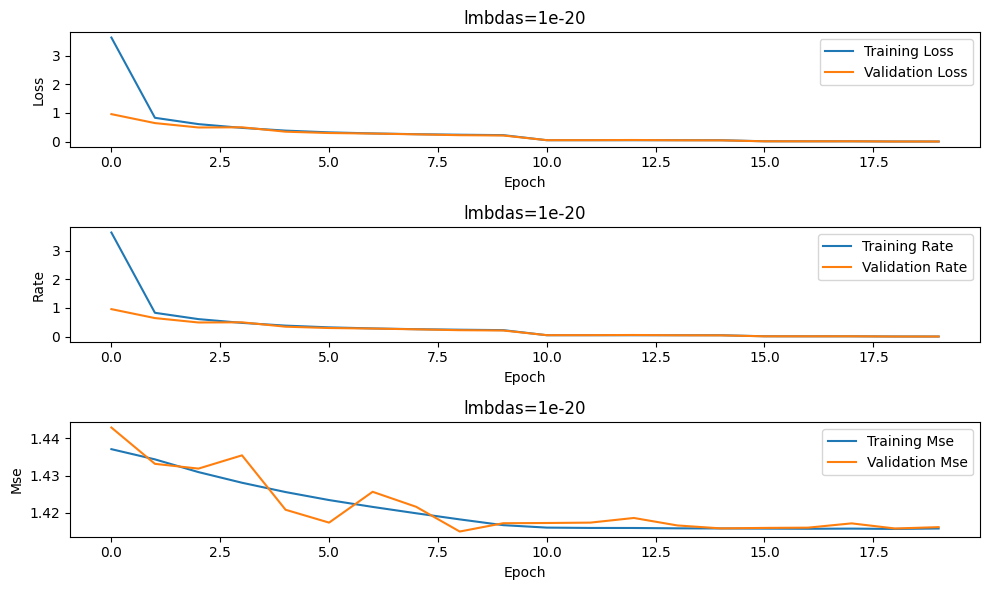

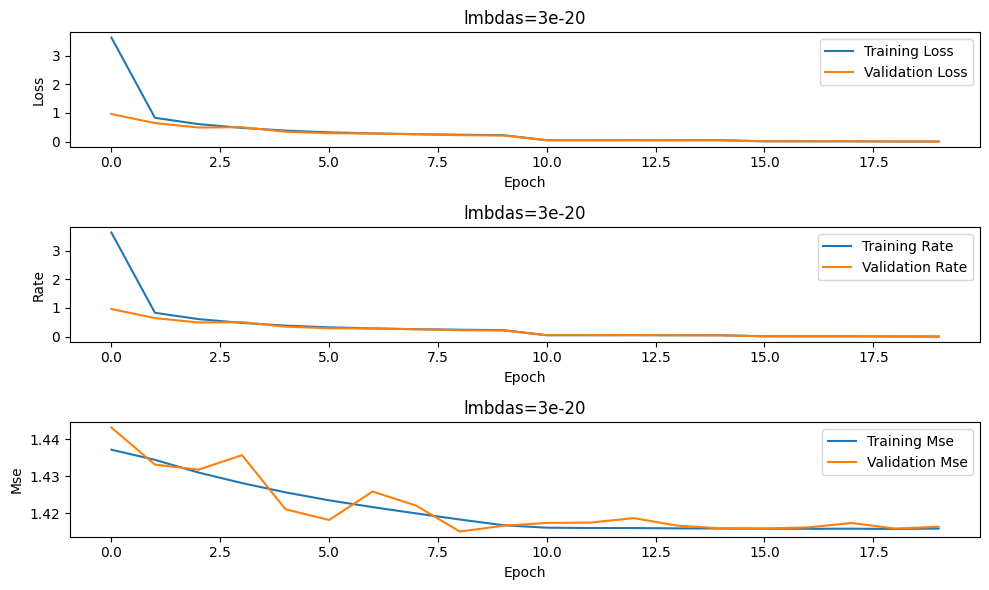

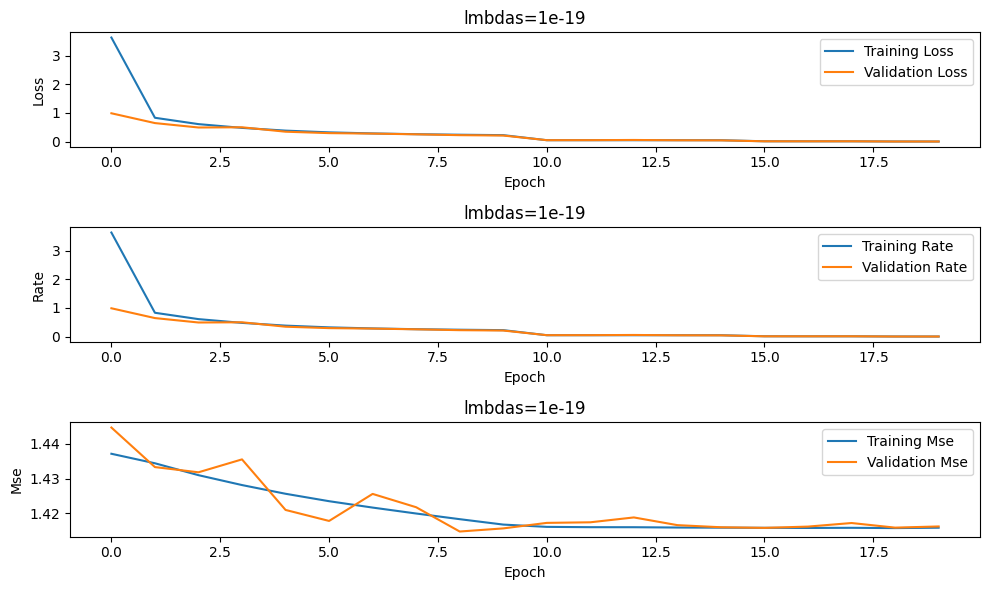

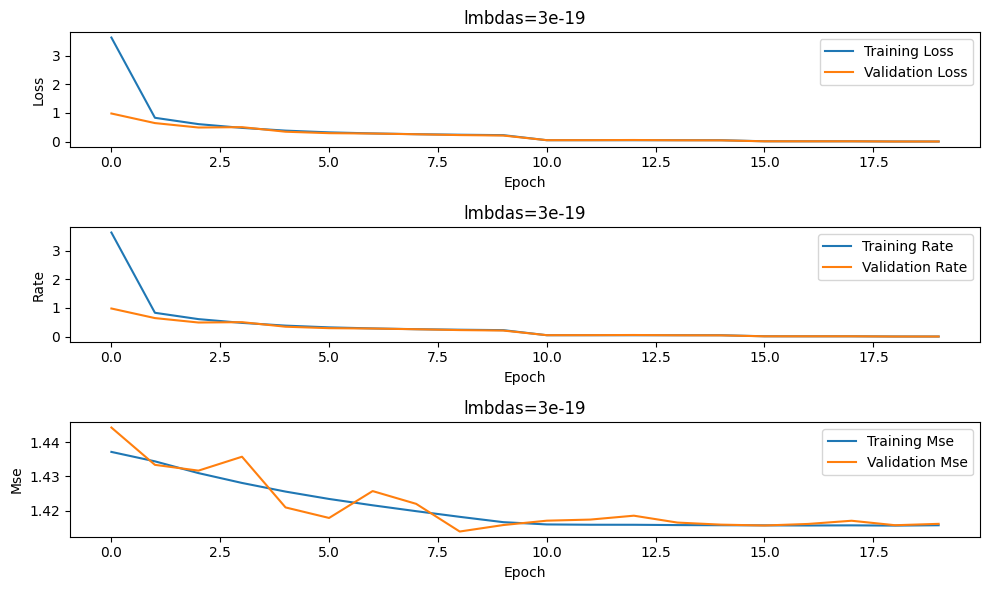

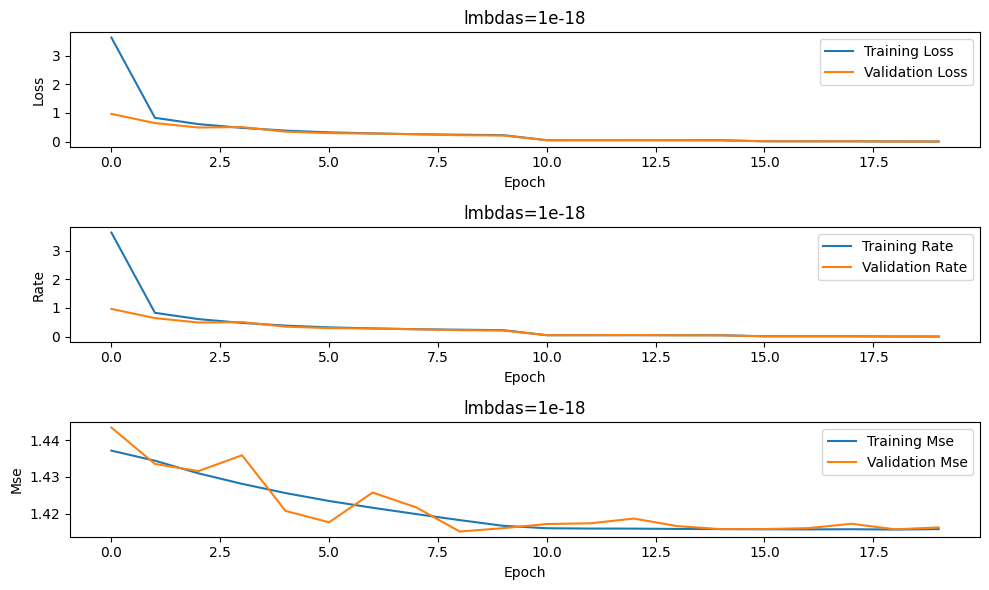

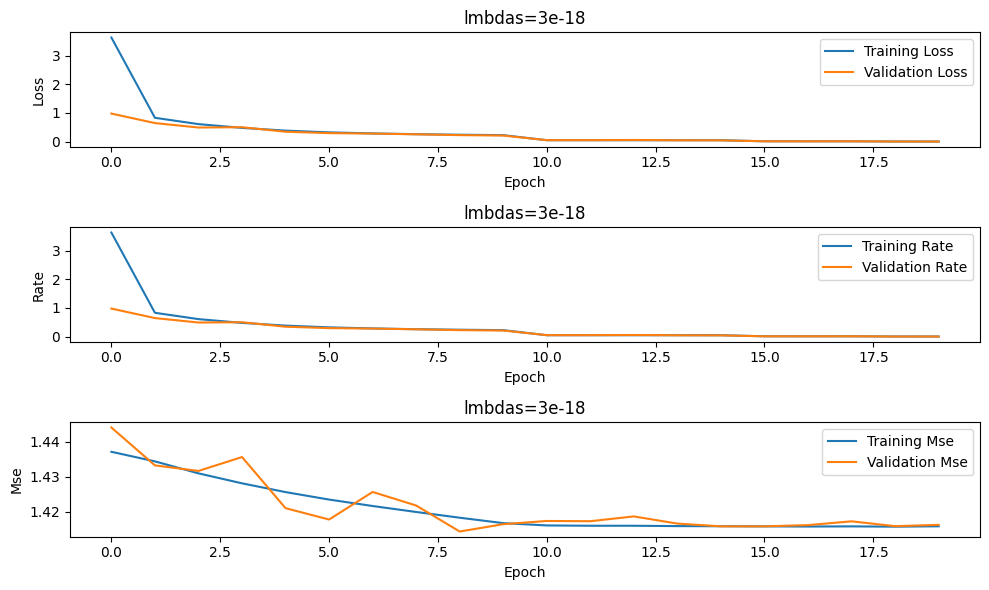

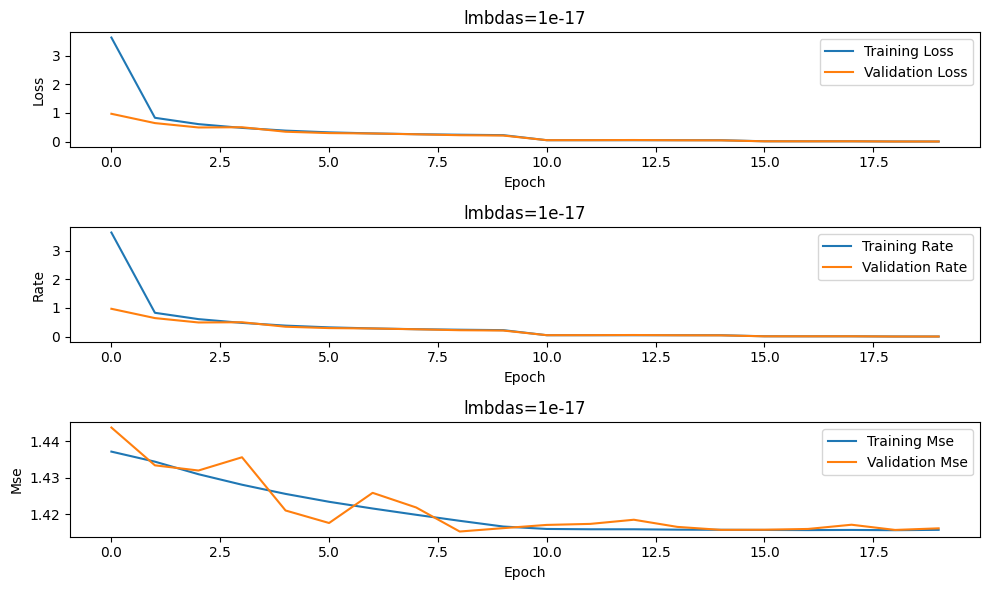

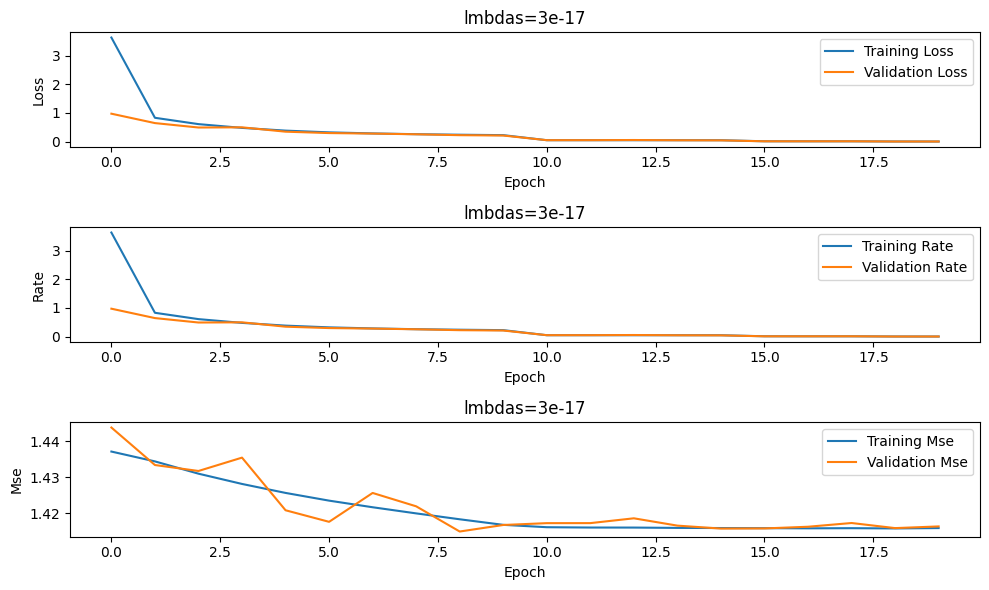

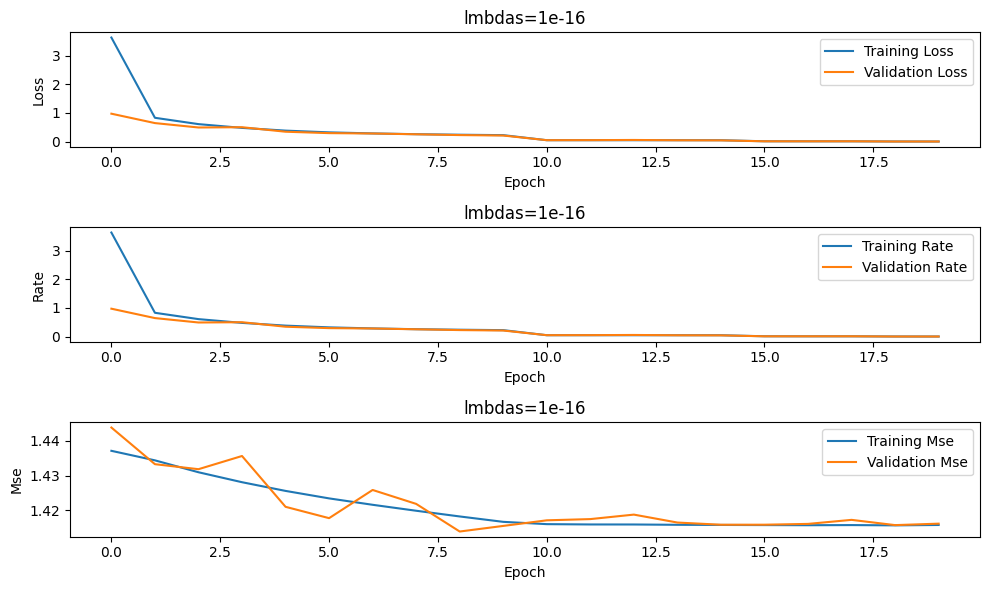

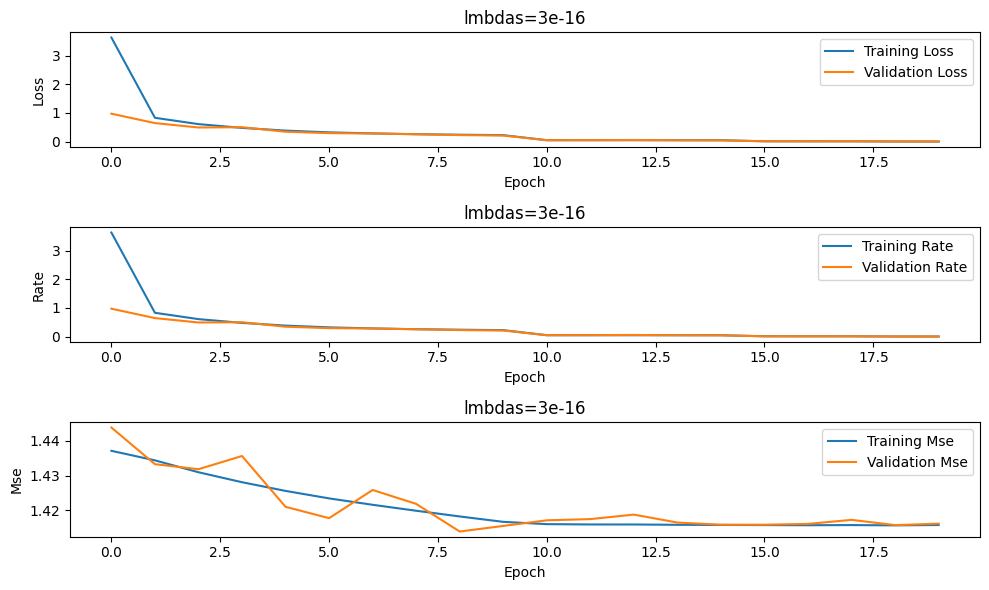

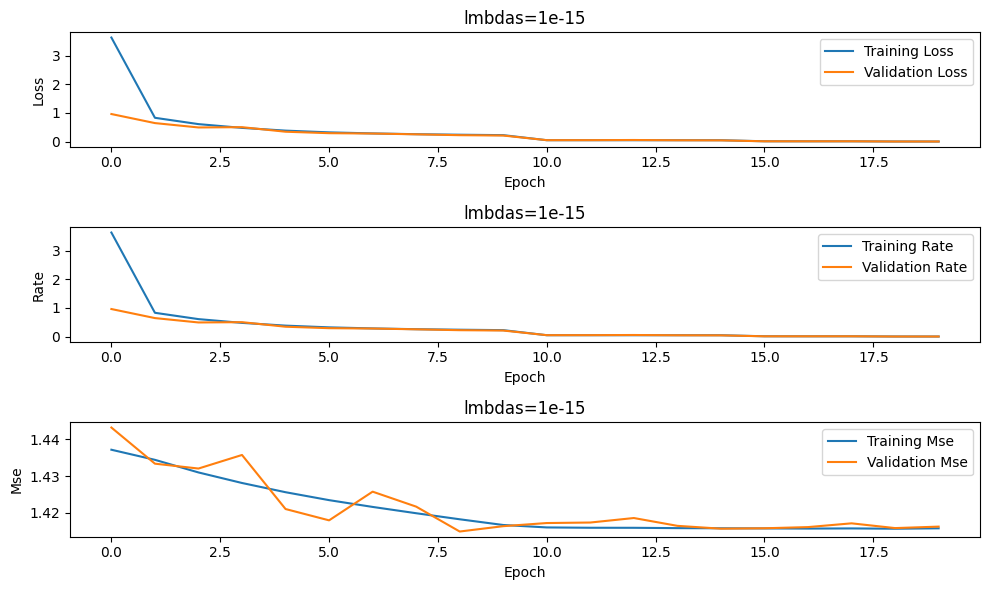

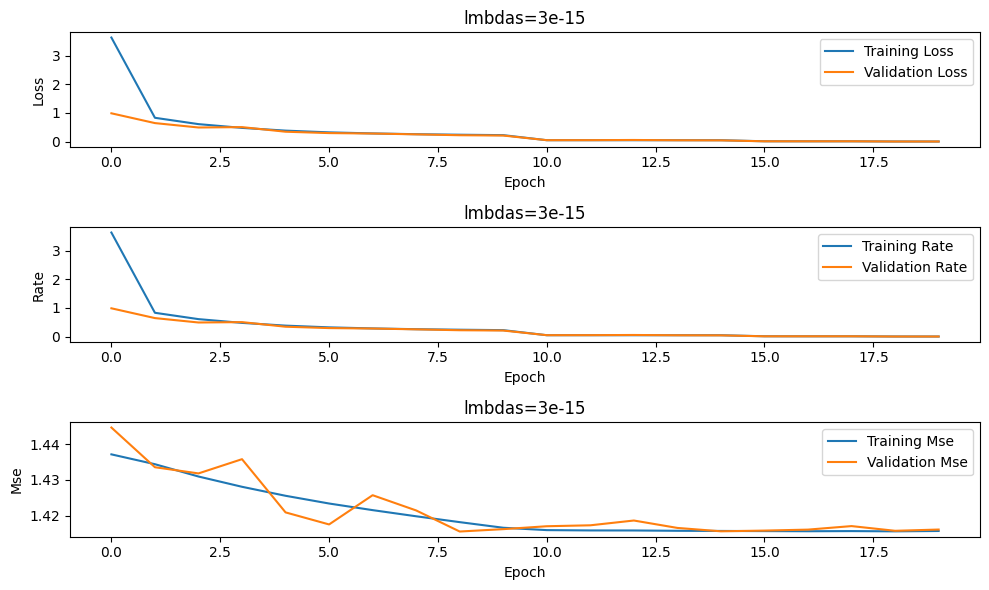

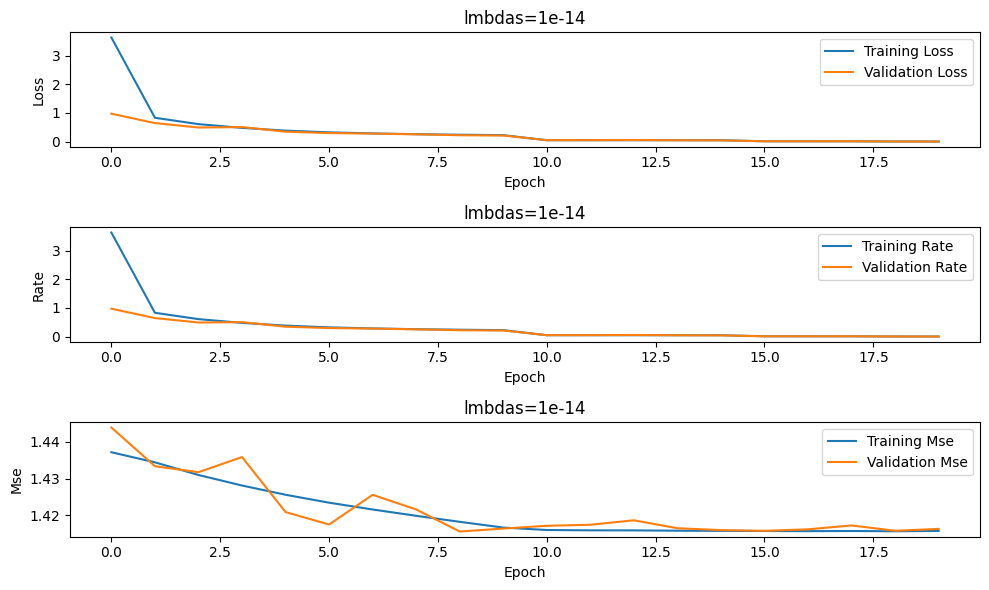

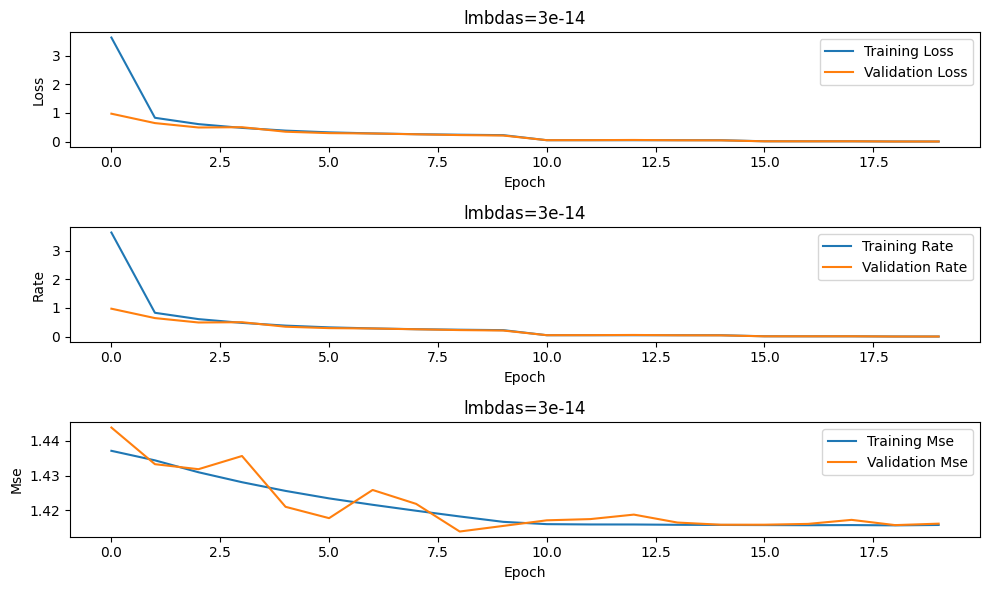

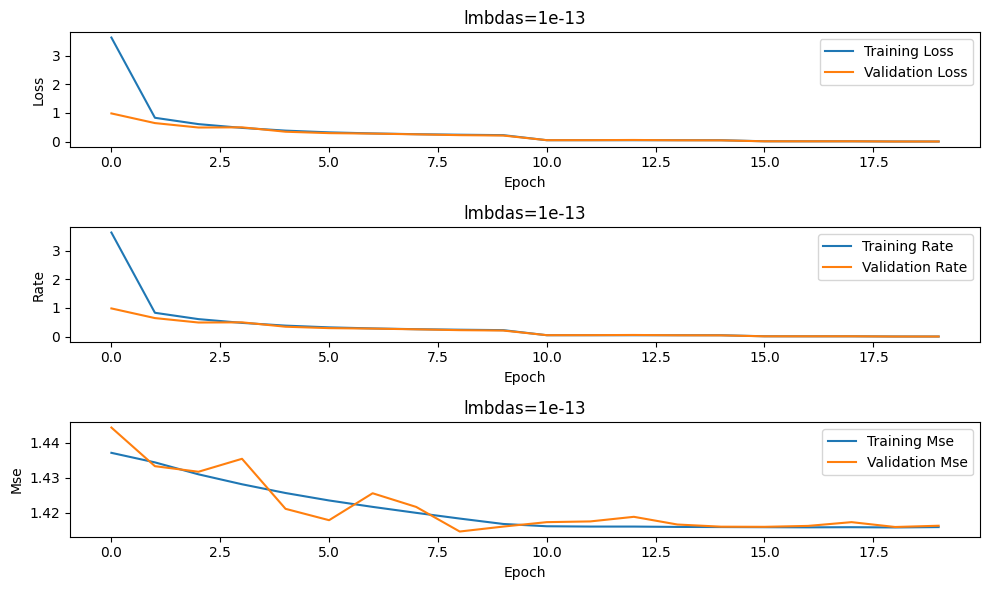

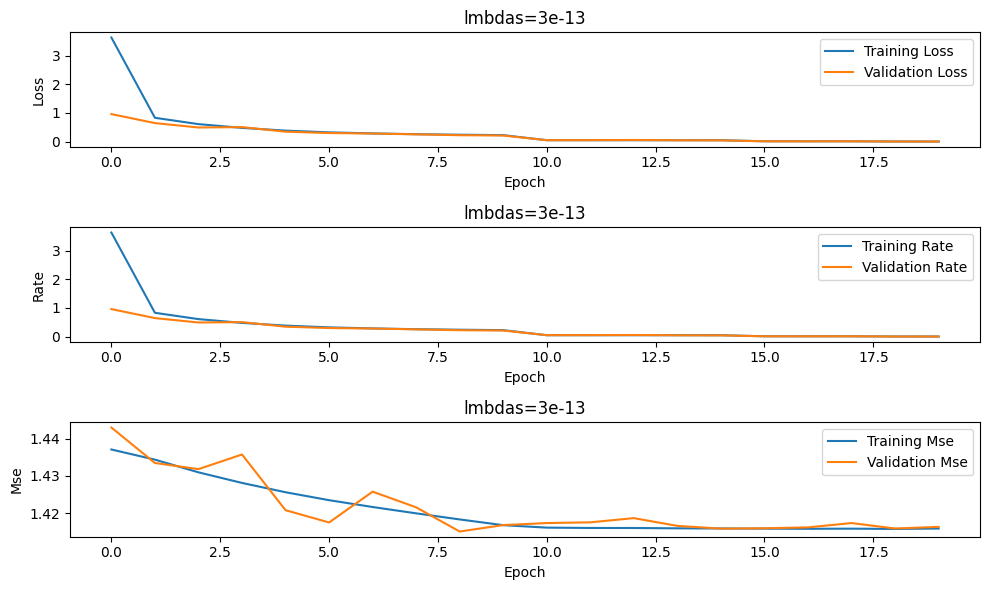

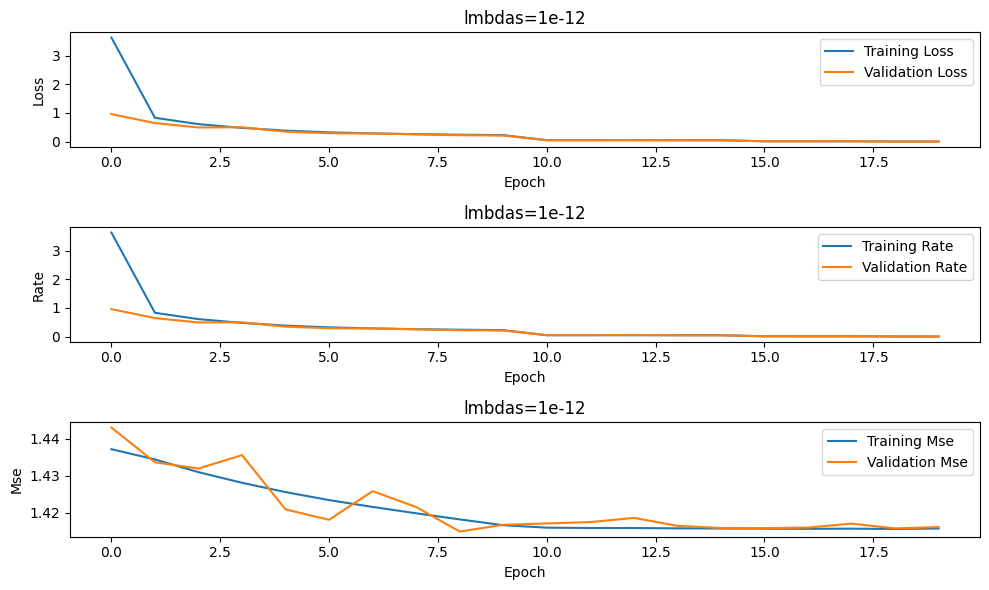

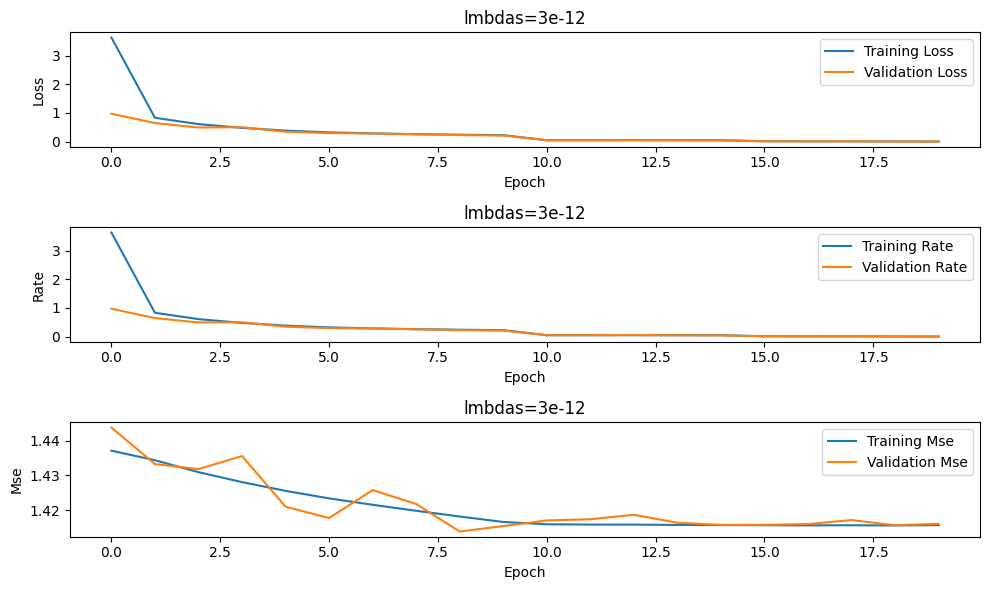

In [33]:
for l in lmbdas:
# epoch별 데이터 추출
    data_dict[l] = sorted(data_dict[l], key=lambda x: x['epoch'])
    
    epochs = [entry['epoch'] for entry in data_dict[l]]
    loss = [entry['loss'] for entry in data_dict[l]]
    val_loss = [entry['val_loss'] for entry in data_dict[l]]
    rate = [entry['rate'] for entry in data_dict[l]]
    val_rate = [entry['val_rate'] for entry in data_dict[l]]
    mse = [entry['mse'] for entry in data_dict[l]]
    val_mse = [entry['val_mse'] for entry in data_dict[l]]
# Plot 설정
    plt.figure(figsize=(10, 6))

    # Loss Plot
    plt.subplot(3, 1, 1)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'lmbdas={l}')
    plt.legend()

    # Rate Plot
    plt.subplot(3, 1, 2)
    plt.plot(epochs, rate, label='Training Rate')
    plt.plot(epochs, val_rate, label='Validation Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Rate')
    plt.title(f'lmbdas={l}')
    plt.legend()
    
    # mse Plot
    plt.subplot(3, 1, 3)
    plt.plot(epochs, mse, label='Training Mse')
    plt.plot(epochs, val_mse, label='Validation Mse')
    plt.xlabel('Epoch')
    plt.ylabel('Mse')
    plt.title(f'lmbdas={l}')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [7]:
data_dict

{0: [{'epoch': 0,
   'loss': 3.63897,
   'rate': 3.63897,
   'mse': 0.00822445,
   'val_loss': 0.837444,
   'val_rate': 0.837444,
   'val_mse': 0.000441118},
  {'epoch': 0,
   'loss': 3.63896,
   'rate': 3.63896,
   'mse': 0.0022832,
   'val_loss': 0.837383,
   'val_rate': 0.837383,
   'val_mse': 0.000413006},
  {'epoch': 0,
   'loss': 3.63898,
   'rate': 3.63894,
   'mse': 0.00109973,
   'val_loss': 0.837351,
   'val_rate': 0.837338,
   'val_mse': 0.000410979},
  {'epoch': 0,
   'loss': 3.63906,
   'rate': 3.63896,
   'mse': 0.00104805,
   'val_loss': 0.837524,
   'val_rate': 0.837483,
   'val_mse': 0.000410968},
  {'epoch': 0,
   'loss': 3.63896,
   'rate': 3.63896,
   'mse': 0.00155377,
   'val_loss': 0.837389,
   'val_rate': 0.837388,
   'val_mse': 0.000411633},
  {'epoch': 0,
   'loss': 3.63895,
   'rate': 3.63895,
   'mse': 0.00421479,
   'val_loss': 0.837479,
   'val_rate': 0.837479,
   'val_mse': 0.000418869},
  {'epoch': 1,
   'loss': 0.772459,
   'rate': 0.772459,
   'mse': 0